In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

In [412]:
train=pd.read_csv("train.csv")

In [413]:
train.shape

(233154, 41)

In [414]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [415]:
train=train[train["PERFORM_CNS.SCORE.DESCRIPTION"]!="Not Scored: More than 50 active Accounts found"]

In [416]:
train.shape

(233151, 41)

In [417]:
train["Employment.Type"].isnull().sum()

7661

In [418]:
train.isnull().sum().head(10)

UniqueID                 0
disbursed_amount         0
asset_cost               0
ltv                      0
branch_id                0
supplier_id              0
manufacturer_id          0
Current_pincode_ID       0
Date.of.Birth            0
Employment.Type       7661
dtype: int64

In [419]:
train["Employment.Type"]=train["Employment.Type"].map({"Self employed":0,"Salaried":1})

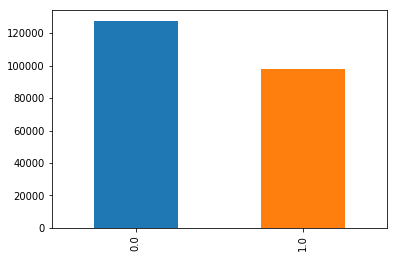

In [421]:
train["Employment.Type"].value_counts().plot(kind="bar")

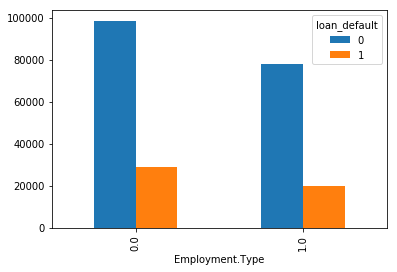

In [422]:
pd.crosstab(train["Employment.Type"],train["loan_default"]).plot(kind="bar")

In [423]:
len(train["supplier_id"].unique())

2953

In [424]:
train["manufacturer_id"].unique()

array([ 45,  86,  48,  51, 120,  49, 145,  67, 153, 156, 152], dtype=int64)

def mapy(x):
    a=[]
    x.split(" ")
    for i in x:
        a.append(i)
    #return(12*int(a[0])+int(a[5])) 
    return(a)

In [1]:
def mapp(x):
    g=x.split(" ")
    a=[]
    b=[]
    for i in g:
        a.append(i)
    x.split(" ")   
    for j in x:
        b.append(j) 
    if(len(a[0])==4 and len(a[1])==4):
        return(12*int(b[0])+int(b[5]))
    elif(len(a[0])==5 and len(a[1])==4):
        return(12*int((b[0]+b[1]))+int(b[6]))
    elif(len(a[0])==4 and len(a[1])==5):
        return(12*int(b[0])+int(b[5]+b[6]))
    else:
        return(12*int(b[0]+b[1])+int(b[5]+b[6]))

In [4]:
mapp('1yrs 10mon')

22

In [427]:
train["avg_acct_age_mnths"]=train["AVERAGE.ACCT.AGE"].apply(lambda x : mapp(x))

In [428]:
train["credit_history_mnths"]=train["CREDIT.HISTORY.LENGTH"].apply(lambda x : mapp(x))

In [429]:
train["value"]=train["asset_cost"]* (train["ltv"]/100)

In [430]:
train["loan_interest_period"]=train["credit_history_mnths"]-train["avg_acct_age_mnths"]

In [431]:
train.shape

(233151, 45)

In [432]:
train.iloc[:,0:20].head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,1.0,03-08-18,6,1998,1,1,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,0.0,26-09-18,6,1998,1,1,0,0,0,0,598
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,0.0,01-08-18,6,1998,1,1,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,0.0,26-10-18,6,1998,1,1,0,0,0,0,305
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,0.0,26-09-18,6,1998,1,1,0,0,0,0,0


In [434]:
train.iloc[:,21:].head(5)

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,avg_acct_age_mnths,credit_history_mnths,value,loan_interest_period
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,52297.2000,0
1,1,1,1,27600,50200,50200,0,0,0,0,...,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23,48002.2650,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,54996.9680,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15,58496.7824,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0,53299.1700,0


In [199]:
#train["AVERAGE.ACCT.AGE"].unique()

In [366]:
train1=train.drop(["UniqueID","branch_id","supplier_id","manufacturer_id","Current_pincode_ID","Date.of.Birth","DisbursalDate","State_ID","Employee_code_ID","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH","Employment.Type"],1)

In [367]:
train1.shape

(233151, 33)

In [368]:
train1.shape

(233151, 33)

In [371]:
train1.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,avg_acct_age_mnths,credit_history_mnths,value,loan_interest_period
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52297.2000,0
1,47145,65550,73.23,1,1,0,0,0,0,598,...,1991,0,0,1,0,1,23,23,48002.2650,0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54996.9680,0
3,57513,66113,88.48,1,1,0,0,0,0,305,...,31,0,0,0,1,1,8,15,58496.7824,7
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,53299.1700,0


In [372]:
label=train1["loan_default"]

In [373]:
#train["PERFORM_CNS.SCORE.DESCRIPTION"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
len(train["PERFORM_CNS.SCORE.DESCRIPTION"].unique())

19

In [374]:
tr["PERFORM_CNS.SCORE.DESCRIPTION"]=le.fit(tr["PERFORM_CNS.SCORE.DESCRIPTION"])
train1["PERFORM_CNS.SCORE.DESCRIPTION"]=le.fit_transform(train1["PERFORM_CNS.SCORE.DESCRIPTION"])

In [375]:
tr["Employment.Type"].unique()

array([1., 0.])

In [376]:
trr=train1.drop(labels="loan_default",axis=1)

In [377]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [378]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trr, label, test_size=0.2, random_state=0)

In [379]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [381]:
X_train.shape

(186520, 32)

In [212]:
trr["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array([13,  8, 11,  0, 16,  3, 12,  1,  2,  4,  7,  5, 10, 14, 18, 15,  6,
        9, 17], dtype=int64)

In [308]:
DTClassifier= DecisionTreeClassifier (max_depth=22, min_samples_split =3,criterion='gini',min_samples_leaf=3)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_test)
DTClassifier.score(X_test, y_test)

0.7403658510432973

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [129]:
model_full_rf.score(X_test, y_test)

0.7602385862214239

In [334]:
test=pd.read_csv("test_bqCt9Pv.csv")

In [335]:
test.shape

(112392, 40)

In [336]:
test["avg_acct_age_mnths"]=test["AVERAGE.ACCT.AGE"].apply(lambda x : mapp(x))

In [337]:
test["credit_history_mnths"]=test["CREDIT.HISTORY.LENGTH"].apply(lambda x : mapp(x))

In [338]:
test["value"]=test["asset_cost"]* (test["ltv"]/100)

In [339]:
test["loan_interest_period"]=test["credit_history_mnths"]-test["avg_acct_age_mnths"]

In [359]:
test.shape


(112392, 44)

In [362]:
test["PERFORM_CNS.SCORE.DESCRIPTION"]=le.fit_transform(test["PERFORM_CNS.SCORE.DESCRIPTION"])

In [363]:
test1=test.drop(["UniqueID","branch_id","supplier_id","manufacturer_id","Current_pincode_ID","Date.of.Birth","DisbursalDate","State_ID","Employee_code_ID","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH","Employment.Type"],1)

In [382]:
test1.shape , train1.shape

((112392, 32), (233151, 33))

In [383]:
test1.isnull().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AMOUNT                   0
SEC.NO.OF.ACCTS                        0
SEC.ACTIVE.ACCTS                       0
SEC.OVERDUE.ACCTS                      0
SEC.CURRENT.BALANCE                    0
SEC.SANCTIONED.AMOUNT                  0
SEC.DISBURSED.AMOUNT                   0
PRIMARY.INSTAL.AMT                     0
SEC.INSTAL.AMT  

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(trr,label)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [385]:
predicted_labels =model_full_rf.predict(test1)

In [386]:
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [387]:
sub1 = pd.DataFrame(pd.read_csv("sample_submission_24jSKY6.csv")['UniqueID'])
sub1['loan_default'] = predicted_labels
sub1.to_csv("submission.csv", index = False)
sub1.head() 

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [392]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.33,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 12,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': 1
}

In [407]:
features =[c for c in train1.columns if c not in ['loan_default']]
target = train1['loan_default']

In [408]:
num_round = 100000
# check random state 44000
folds = StratifiedKFold(n_splits=12, shuffle=False, random_state=12345)
oof = np.zeros(len(train1))
predictions = np.zeros(len(test1))

In [409]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train1.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train1.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train1.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 2500)
    oof[val_idx] = clf.predict(train1.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(test1[features], num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(label,oof)))

Fold 0
Training until validation scores don't improve for 2500 rounds.
[1000]	training's auc: 0.632505	valid_1's auc: 0.624886
[2000]	training's auc: 0.636899	valid_1's auc: 0.627323
[3000]	training's auc: 0.640196	valid_1's auc: 0.62804
[4000]	training's auc: 0.642243	valid_1's auc: 0.628324
[5000]	training's auc: 0.644156	valid_1's auc: 0.628223
[6000]	training's auc: 0.645692	valid_1's auc: 0.627897
Early stopping, best iteration is:
[4041]	training's auc: 0.642315	valid_1's auc: 0.628359
Fold 1
Training until validation scores don't improve for 2500 rounds.
[1000]	training's auc: 0.63268	valid_1's auc: 0.62152
[2000]	training's auc: 0.637122	valid_1's auc: 0.62378
[3000]	training's auc: 0.640398	valid_1's auc: 0.624818
[4000]	training's auc: 0.642495	valid_1's auc: 0.62554
[5000]	training's auc: 0.644418	valid_1's auc: 0.625767
[6000]	training's auc: 0.645902	valid_1's auc: 0.625603
[7000]	training's auc: 0.646946	valid_1's auc: 0.625397
Early stopping, best iteration is:
[4893]	tr

In [410]:
sub1 = pd.DataFrame(pd.read_csv("sample_submission_24jSKY6.csv")['UniqueID'])
sub1['loan_default'] = predictions
sub1.to_csv("submission1.csv", index = False)
sub1.head() 

,UniqueID,loan_default
0,655269,0.263066
1,723482,0.218884
2,758529,0.275124
3,763449,0.169627
4,708663,0.247775
